### basic statistics:
- number of SVs, per SV type, per sample
- coverage dist of SVs, per SV type, per sample
- SV len dist
- SV Counts per SV type
- do this for 4 samples in question + 30 gregor parents

In [1]:
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data_dir = "/oak/stanford/groups/smontgom/jonnguye/SV_benchmarking/stats"
os.listdir(data_dir)

['gregor', 'test']

In [3]:
def read_data(filepath, group, sample_id):
    sample_df = pd.read_csv(filepath, sep="\t")
    col = list(sample_df.columns)
    sample_df["SAMPLE_ID"] = sample_id
    if group == "test":
        if sample_id == "xist2" or sample_id == "NT2":
            group = "exp"
        else:
            group = "card"
    sample_df["GROUP"] = group
    col = ["GROUP","SAMPLE_ID"] + col
    sample_df = sample_df[col]
    return sample_df

In [4]:
df = pd.DataFrame()

for group in ["test","gregor"]:
    for filename in os.listdir(os.path.join(data_dir, group)):
        sample_id = filename.split(".")[0]
        filepath = os.path.join(data_dir, group, filename)
        sample_df = read_data(filepath, group, sample_id)
        df = pd.concat([df,sample_df])
df
    

,GROUP,SAMPLE_ID,ID,CHR,POS,FILTER,SVTYPE,SVLEN,DP
0,card,002-4,pbsv.DEL.0,chr1,893789,PASS,DEL,-36.0,3
1,card,002-4,pbsv.INS.DUP.1,chr1,948671,PASS,DUP,38.0,3
2,card,002-4,pbsv.DEL.2,chr1,964624,PASS,DEL,-74.0,6
3,card,002-4,pbsv.DEL.3,chr1,976745,PASS,DEL,-349.0,4
4,card,002-4,pbsv.INS.4,chr1,988819,PASS,INS,46.0,3
...,...,...,...,...,...,...,...,...,...
51776,gregor,GSS116494,pbsv.BND.chrUn_KI270751v1:148748-chr14_GL00000...,chrUn_KI270751v1,148748,NearContigEnd,BND,NaN,98
51777,gregor,GSS116494,pbsv.BND.chrUn_GL000214v1:137713-chrUn_GL00022...,chrUn_GL000214v1,137713,NearContigEnd,BND,NaN,193
51778,gregor,GSS116494,pbsv.BND.chrUn_KI270742v1:938-chrUn_GL000224v1...,chrUn_KI270742v1,938,NearContigEnd,BND,NaN,390
51779,gregor,GSS116494,pbsv.BND.chrUn_KI270742v1:19522-chrUn_GL000224...,chrUn_KI270742v1,19522,PASS,BND,NaN,363


### Filter for PASS, and SVLEN >= 50 or SVLEN <= -50 or BND, and CHR is not contig or M

In [5]:
df = df[(df["FILTER"]=="PASS")]
df = df[(df["SVLEN"]>=50) | (df["SVLEN"]<=-50) | (df["SVTYPE"]== "BND")]
df = df[(df["CHR"].str.len() <=5) & (df["CHR"] != "chrM")]

In [6]:
df

,GROUP,SAMPLE_ID,ID,CHR,POS,FILTER,SVTYPE,SVLEN,DP
2,card,002-4,pbsv.DEL.2,chr1,964624,PASS,DEL,-74.0,6
3,card,002-4,pbsv.DEL.3,chr1,976745,PASS,DEL,-349.0,4
7,card,002-4,pbsv.INS.7,chr1,1134747,PASS,INS,58.0,6
11,card,002-4,pbsv.INS.11,chr1,1192629,PASS,INS,96.0,5
13,card,002-4,pbsv.INS.13,chr1,1202495,PASS,INS,327.0,4
...,...,...,...,...,...,...,...,...,...
51305,gregor,GSS116494,pbsv.BND.chrY:56854864-chr21:10458141,chrY,56854864,PASS,BND,NaN,182
51306,gregor,GSS116494,pbsv.INS.1782,chrY,56856796,PASS,INS,57.0,161
51307,gregor,GSS116494,pbsv.DEL.1783,chrY,56858330,PASS,DEL,-213.0,159
51309,gregor,GSS116494,pbsv.INS.1785,chrY,56867594,PASS,INS,133.0,151


### number of SVs, per SV type, per sample

In [7]:
sv_counts = df.groupby(["GROUP","SAMPLE_ID","SVTYPE"]).count().reset_index()[["GROUP","SAMPLE_ID","SVTYPE","ID"]]
sv_counts = sv_counts.rename(columns={"ID":"SVCOUNTS"})
sv_counts

,GROUP,SAMPLE_ID,SVTYPE,SVCOUNTS
0,card,002-1,BND,1
1,card,002-1,DEL,66
2,card,002-1,DUP,5
3,card,002-1,INS,47
4,card,002-1,INV,1
...,...,...,...,...
180,gregor,GSS126844,BND,100
181,gregor,GSS126844,DEL,9619
182,gregor,GSS126844,DUP,488
183,gregor,GSS126844,INS,12845


In [8]:
sv_counts["SVTYPE"].unique()

array(['BND', 'DEL', 'DUP', 'INS', 'INV'], dtype=object)

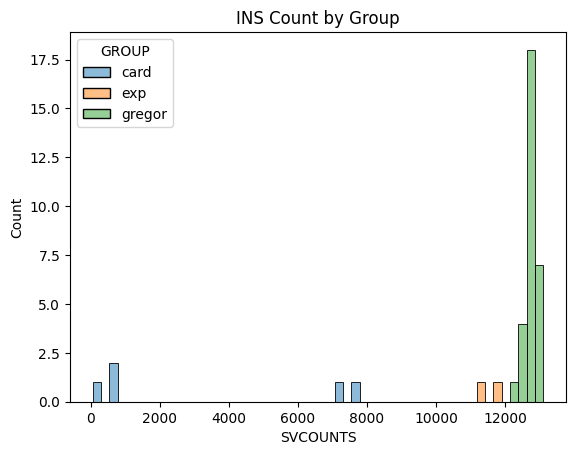

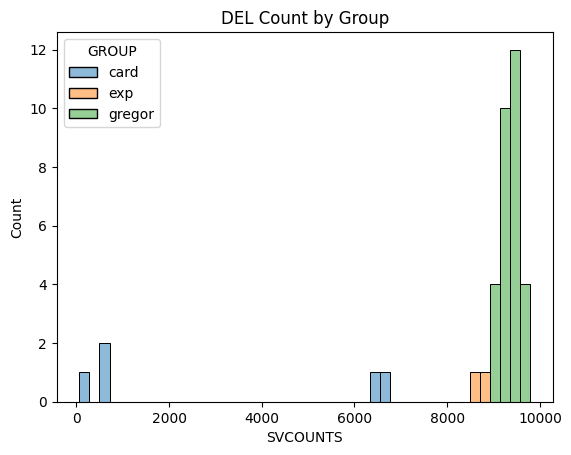

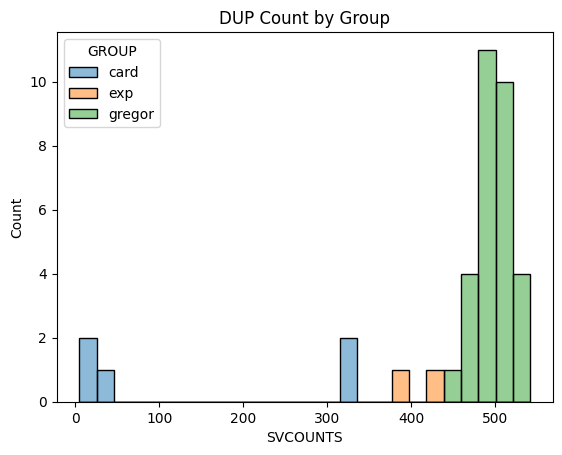

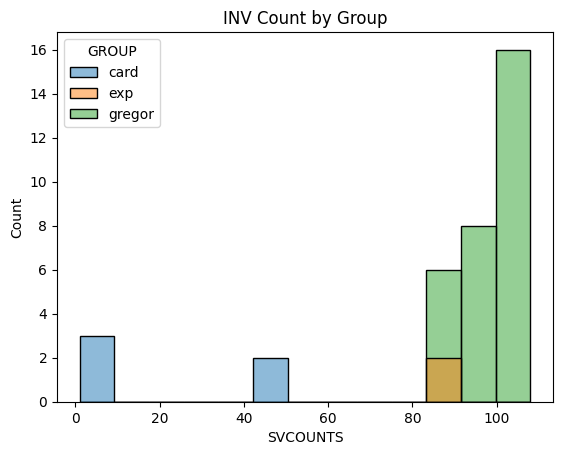

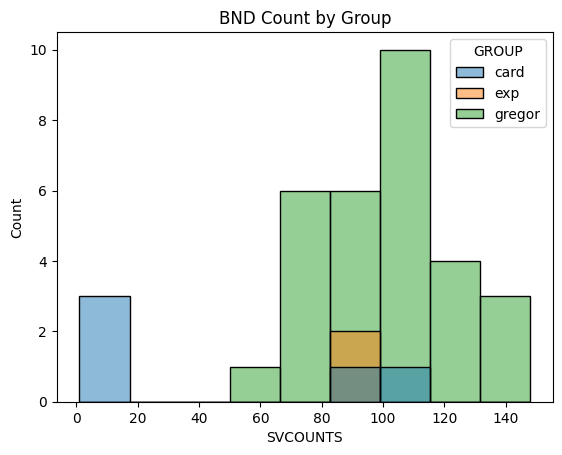

In [25]:
for i, svtype in enumerate(["INS","DEL","DUP","INV","BND"]):
    plt.figure(i)
    ax = sns.histplot(data=sv_counts[sv_counts["SVTYPE"]==svtype], x="SVCOUNTS", hue="GROUP")
    ax.set_title(f'{svtype} Count by Group')

### coverage dist of SVs, per SV type, per sample

In [10]:
#depth can have huge outliers
df.DP.describe()

count    758294.000000
mean         28.352618
std          21.738921
min           2.000000
25%          20.000000
50%          27.000000
75%          35.000000
max        3903.000000
Name: DP, dtype: float64

In [11]:
#limiting to mean + 2 sigma
max_depth = df.DP.mean() + 2 * df.DP.std()
limit_df = df[df["DP"] <= max_depth]

<Figure size 640x480 with 0 Axes>

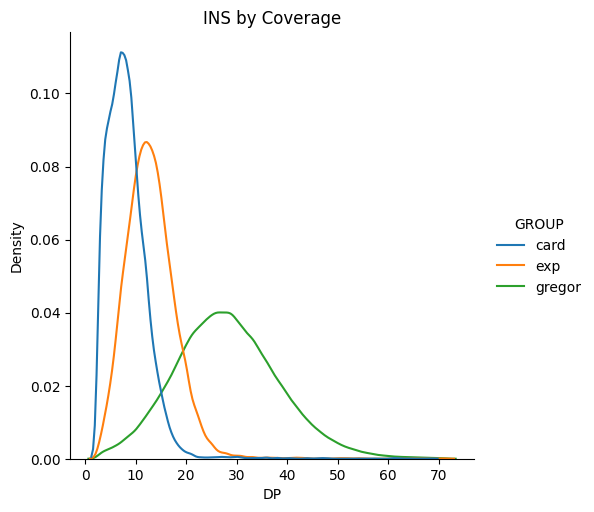

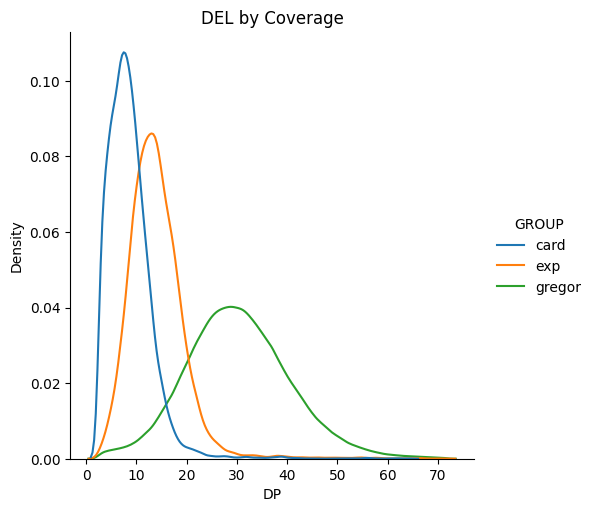

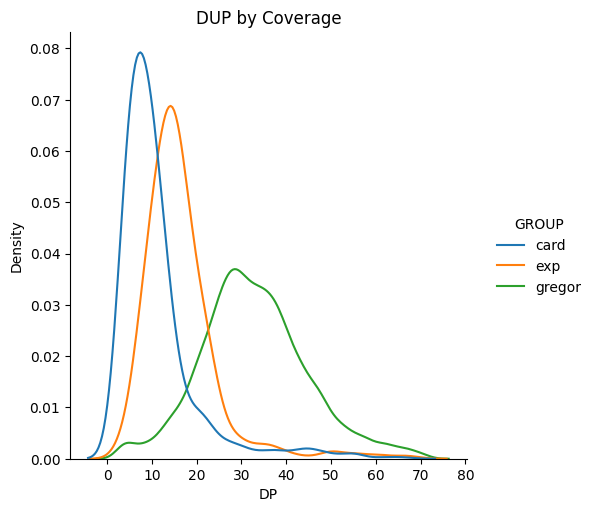

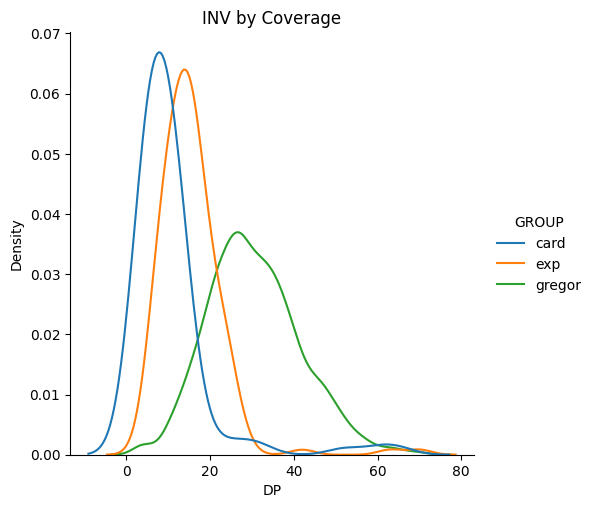

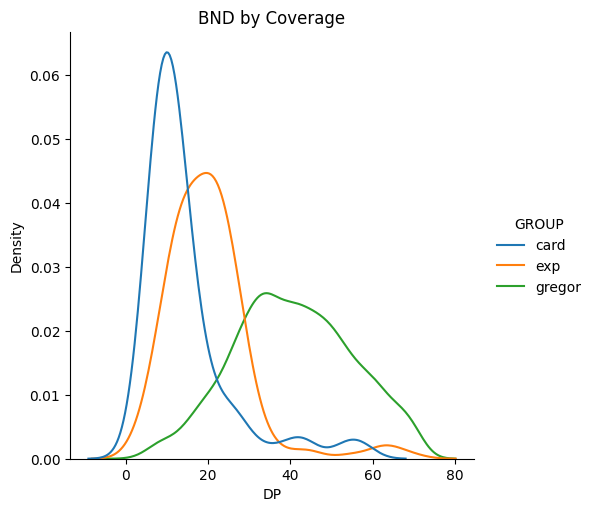

In [12]:
for i, svtype in enumerate(["INS","DEL","DUP","INV","BND"]):
    plt.figure(i)
    ax = sns.displot(data=limit_df[(limit_df["SVTYPE"]==svtype)], x="DP", hue="GROUP", common_norm=False, kind='kde')
    plt.title(f"{svtype} by Coverage")

### SV len dist

<Figure size 640x480 with 0 Axes>

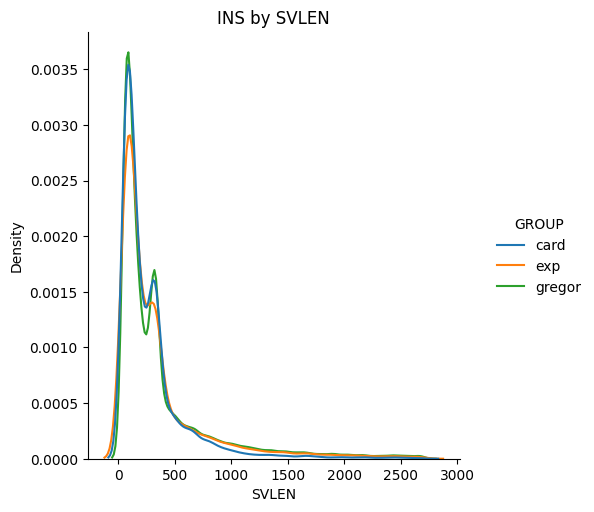

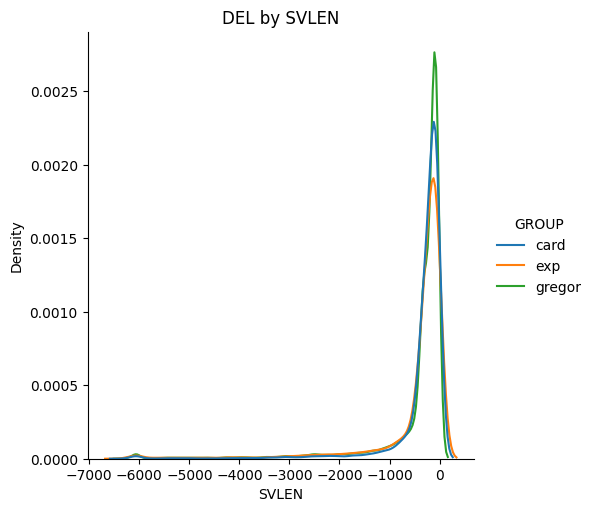

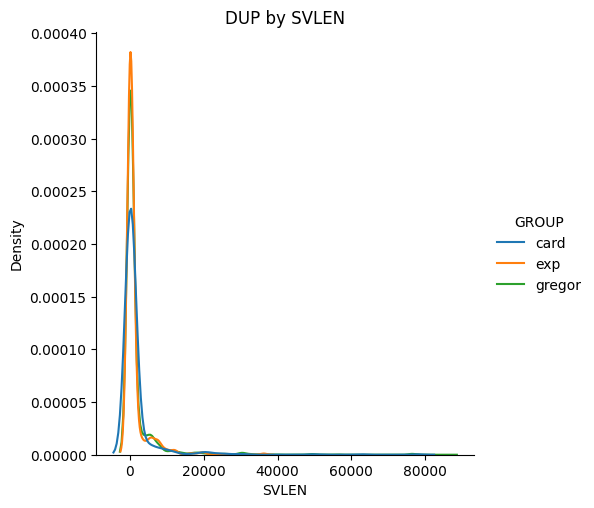

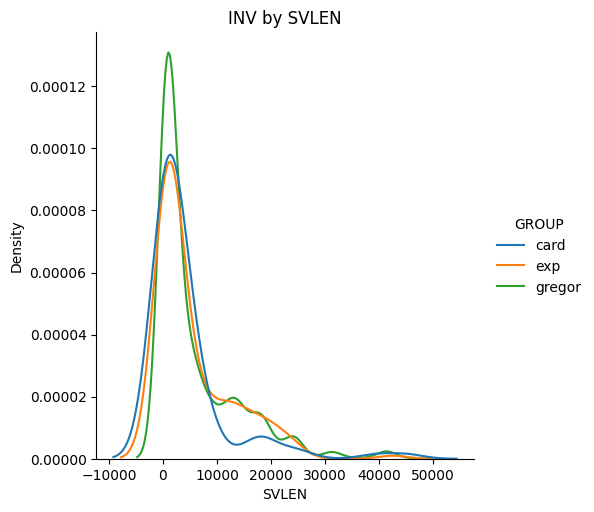

In [13]:
# bound limits for each type of SV, as they have different ranges
for i, svtype in enumerate(["INS","DEL","DUP","INV"]):
    plt.figure(i)
    sub_df = df[df["SVTYPE"] == svtype]
    lower_limit = sub_df.SVLEN.mean() - 2 * sub_df.SVLEN.std()
    upper_limit = sub_df.SVLEN.mean() + 2 * sub_df.SVLEN.std()
    bound_df = sub_df[(sub_df["SVLEN"]>=lower_limit) & (sub_df["SVLEN"]<=upper_limit)]
    ax = sns.displot(data=bound_df, x="SVLEN", hue="GROUP", common_norm=False, kind='kde')
    plt.title(f"{svtype} by SVLEN")